In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import TensorBoard
import os

In [2]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

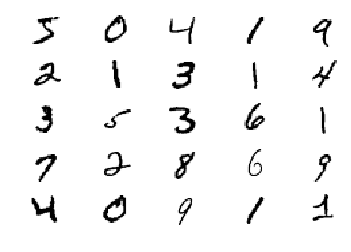

In [3]:
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(xtrain[i], cmap=plt.cm.Greys)
    plt.axis('off')

In [18]:
K.clear_session()

model = Sequential([
    Dense(200, input_shape=(784,)),
    Activation('relu'),
    Dense(150),
    Activation('sigmoid'),
    Dense(10),
    Activation('softmax'),
])

In [19]:
xtrain2 = xtrain.reshape(60000,28*28)

In [20]:
ytrain2 = to_categorical(ytrain)

In [21]:
xtest2 = xtest.reshape(10000,28*28)

In [22]:
ytest2 = to_categorical(ytest)

In [23]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
history = model.fit(xtrain2, ytrain2, epochs=80, validation_split=0.2, batch_size=200)

Train on 48000 samples, validate on 12000 samples
Epoch 1/80
48000/48000 [==============================] - 1s 19us/step - loss: 0.5409 - acc: 0.8569 - val_loss: 0.2624 - val_acc: 0.9260
Epoch 2/80
48000/48000 [==============================] - 1s 16us/step - loss: 0.2405 - acc: 0.9283 - val_loss: 0.2123 - val_acc: 0.9378
Epoch 3/80
48000/48000 [==============================] - 1s 14us/step - loss: 0.1932 - acc: 0.9424 - val_loss: 0.1764 - val_acc: 0.9479
Epoch 4/80
48000/48000 [==============================] - 1s 15us/step - loss: 0.1681 - acc: 0.9501 - val_loss: 0.1605 - val_acc: 0.9539
Epoch 5/80
48000/48000 [==============================] - 1s 14us/step - loss: 0.1480 - acc: 0.9549 - val_loss: 0.1568 - val_acc: 0.9542
Epoch 6/80
48000/48000 [==============================] - 1s 15us/step - loss: 0.1371 - acc: 0.9582 - val_loss: 0.1467 - val_acc: 0.9552
Epoch 7/80
48000/48000 [==============================] - 1s 15us/step - loss: 0.1251 - acc: 0.9620 - val_loss: 0.1433 - val_acc

48000/48000 [==============================] - 1s 15us/step - loss: 0.0387 - acc: 0.9885 - val_loss: 0.1136 - val_acc: 0.9738
Epoch 61/80
48000/48000 [==============================] - 1s 14us/step - loss: 0.0400 - acc: 0.9875 - val_loss: 0.1169 - val_acc: 0.9724
Epoch 62/80
48000/48000 [==============================] - 1s 15us/step - loss: 0.0387 - acc: 0.9881 - val_loss: 0.1134 - val_acc: 0.9722
Epoch 63/80
48000/48000 [==============================] - 1s 15us/step - loss: 0.0390 - acc: 0.9879 - val_loss: 0.1095 - val_acc: 0.9730
Epoch 64/80
48000/48000 [==============================] - 1s 14us/step - loss: 0.0416 - acc: 0.9869 - val_loss: 0.1129 - val_acc: 0.9713
Epoch 65/80
48000/48000 [==============================] - 1s 15us/step - loss: 0.0405 - acc: 0.9878 - val_loss: 0.1172 - val_acc: 0.9714
Epoch 66/80
48000/48000 [==============================] - 1s 15us/step - loss: 0.0398 - acc: 0.9882 - val_loss: 0.1242 - val_acc: 0.9691
Epoch 67/80
48000/48000 [=====================

In [25]:
model.evaluate(xtrain2, ytrain2, batch_size=200)

60000/60000 [==============================] - 0s 6us/step


[0.05130625036545098, 0.9855000096559524]

In [26]:
loss, accuracy = model.evaluate(xtest2, ytest2, batch_size=200)

10000/10000 [==============================] - 0s 5us/step


In [27]:
print(f'Our loss is {loss} and our accuracy is {accuracy}')

Our loss is 0.10547848138259724 and our accuracy is 0.9740000045299531


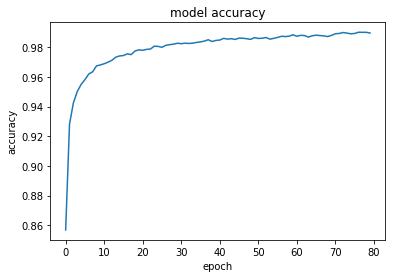

In [28]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()